In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [5]:
# Read train file
train_df = pd.read_csv('train.csv')

In [6]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
# Compute the number of missing values in each column
train_df.isnull().sum(axis=0).reset_index()

,index,0
0,id,0
1,vendor_id,0
2,pickup_datetime,0
3,dropoff_datetime,0
4,passenger_count,0
5,pickup_longitude,0
6,pickup_latitude,0
7,dropoff_longitude,0
8,dropoff_latitude,0
9,store_and_fwd_flag,0


In [8]:
# Review of the test dataset
test_df = pd.read_csv('test.csv')
test_df.shape

(625134, 9)

In [9]:
train_df = pd.read_csv('train.csv')
train_df.shape

(1458644, 11)

Notice that the test data has two few columns than the training data.  The test data does not have the dropoff time and the target variable(trip duration).

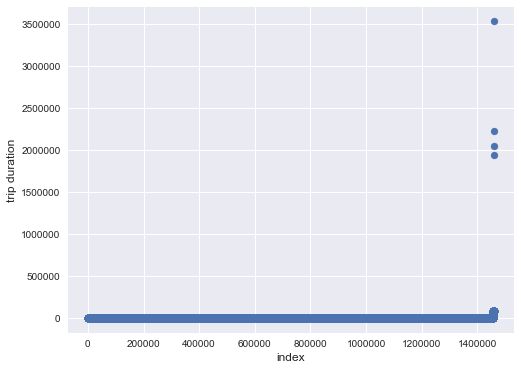

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.trip_duration.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('trip duration', fontsize=12)
plt.show()

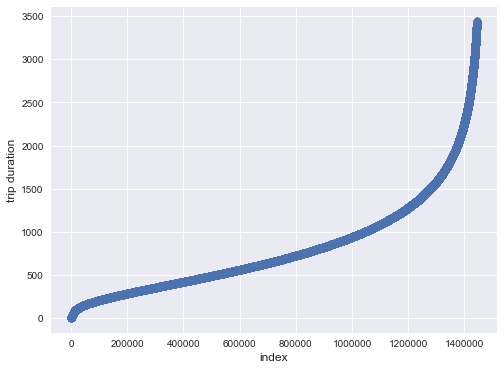

In [11]:
# Removing some of the trip durations in the training dataset as they appear to be outliers
q = train_df.trip_duration.quantile(0.99)
train_df = train_df[train_df.trip_duration < q]
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.trip_duration.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('trip duration', fontsize=12)
plt.show()

This allows for a more accurate analysis, as we have stripped away the outliers.

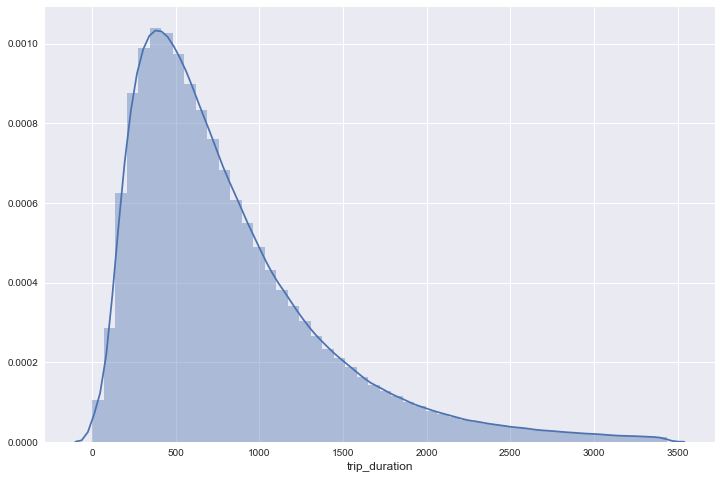

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(train_df.trip_duration.values, bins =50, kde=True)
plt.xlabel('trip_duration', fontsize=12)
plt.show()

We have a skewed distribution. Lets apply a logorithm to make a normal distibution.

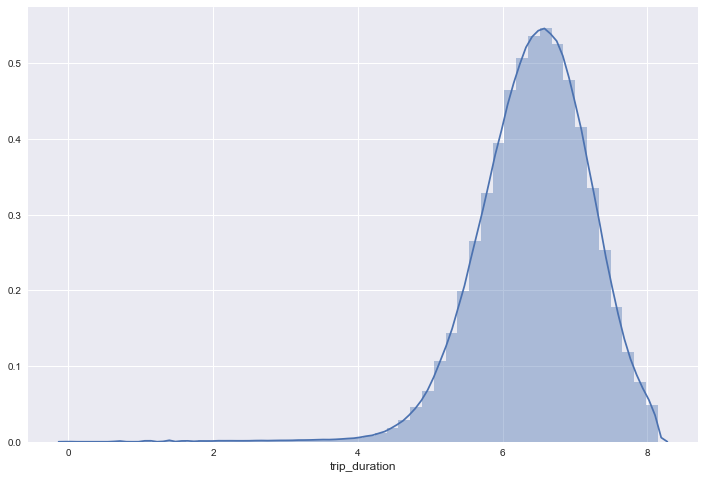

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(train_df.trip_duration.values), bins=50, kde=True)
plt.xlabel('trip_duration', fontsize=12)
plt.show()

/Users/davidstroud/anaconda/envs/snakes/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3459: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/davidstroud/anaconda/envs/snakes/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3472: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


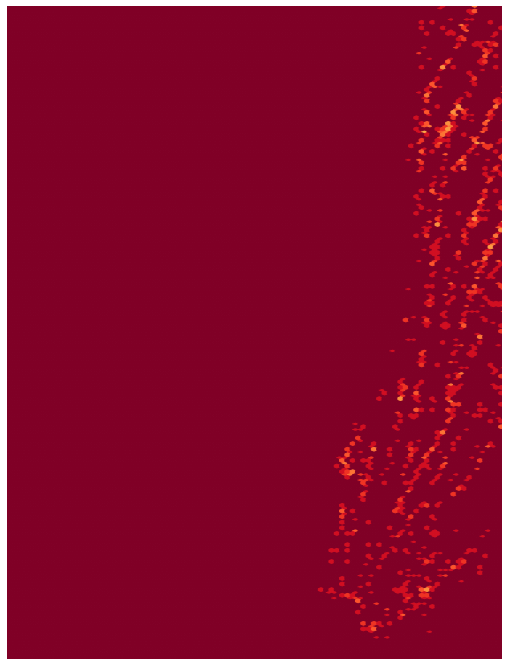

In [14]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
west, south, east, north = -74.05, 40.70, -74.00, 40.75

samples = train_df.sample(n=10000)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(samples['pickup_longitude'].values, samples['pickup_latitude'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r);